In [11]:
from keras import layers, models

In [12]:
class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = output(h)
        
        super().__init__(x, y)
        
        self.compile(loss='mse', optimizer='sgd')

In [13]:
from keras import datasets
from sklearn import preprocessing

In [14]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return (X_train, y_train), (X_test, y_test)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os

import matplotlib

def save_history_history(fname, history_history, fold=''):
    np.save(os.path.join(fold, fname), history_history)


def load_history_history(fname, fold=''):
    history_history = np.load(os.path.join(fold, fname)).item(0)
    return history_history


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_acc(history)
    plt.subplot(1, 2, 2)
    plot_loss(history)

    
def plot_loss_acc(history):
    plot_loss(history, '(a) Loss trajectory')
    plt.show()            
    plot_acc(history, '(b) Accracy trajectory')
    plt.show()
    
    
def plot_acc_loss(history):
    plot_acc(history, '(a) Accracy trajectory')
    plt.show()
    plot_loss(history, '(b) Loss trajectory')
    plt.show()       

In [16]:
def main():
    Nin = 13
    Nh = 5
    Nout = 1
    
    model = ANN(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose =2)
    
    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performance_test))
    
    plot_loss(history)
    plt.show()

Train on 323 samples, validate on 81 samples
Epoch 1/100
 - 0s - loss: 549.2299 - val_loss: 544.1247
Epoch 2/100
 - 0s - loss: 390.5700 - val_loss: 103.3929
Epoch 3/100
 - 0s - loss: 98.1901 - val_loss: 85.2140
Epoch 4/100
 - 0s - loss: 77.4438 - val_loss: 81.0683
Epoch 5/100
 - 0s - loss: 66.6654 - val_loss: 61.9228
Epoch 6/100
 - 0s - loss: 61.4270 - val_loss: 65.4058
Epoch 7/100
 - 0s - loss: 71.9419 - val_loss: 58.9549
Epoch 8/100
 - 0s - loss: 51.9858 - val_loss: 93.1045
Epoch 9/100
 - 0s - loss: 62.6432 - val_loss: 63.3928
Epoch 10/100
 - 0s - loss: 47.3981 - val_loss: 53.1133
Epoch 11/100
 - 0s - loss: 42.8143 - val_loss: 49.0436
Epoch 12/100
 - 0s - loss: 40.8241 - val_loss: 41.4362
Epoch 13/100
 - 0s - loss: 38.3865 - val_loss: 54.3854
Epoch 14/100
 - 0s - loss: 42.7423 - val_loss: 41.0525
Epoch 15/100
 - 0s - loss: 40.5258 - val_loss: 44.4033
Epoch 16/100
 - 0s - loss: 34.1185 - val_loss: 43.9181
Epoch 17/100
 - 0s - loss: 32.5672 - val_loss: 35.5859
Epoch 18/100
 - 0s - loss

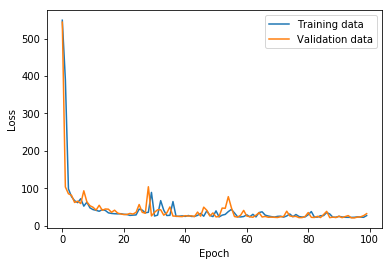

In [17]:
if __name__ == '__main__':
    main()